In [1]:
# import the libraries

import pandas as pd # for data manipulation
from collections import Counter # for specialised data types

from sklearn.preprocessing import MinMaxScaler # for scaling the data
from sklearn.cluster import KMeans # import k-means algorithm

# for visualising the data
import matplotlib.pyplot as plt # visualisation library
import seaborn as sns # visualisation library

In [2]:
# laod the data

audio_features_df = pd.read_csv("../data/music/audio_data_w_features.csv")
audio_features_df.head()

,audio_file_name,zero_crossing_rate,energy
0,classical1.wav,35019,33.268707
1,marlene.wav,53817,52.843853
2,hendrix.wav,62196,75.526360
3,beatles.wav,23928,84.270905
4,birdland.wav,77597,111.841644


In [3]:
# check the shape

audio_features_df.shape

(30, 3)

In [4]:
# check info
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   audio_file_name     30 non-null     object 
 1   zero_crossing_rate  30 non-null     int64  
 2   energy              30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [5]:
# you can either drop the audio file name or set it as an index 

audio_features_df = audio_features_df.set_index("audio_file_name")


In [6]:
# identify missing data

audio_features_df.isnull().sum()

# no missing data

zero_crossing_rate    0
energy                0
dtype: int64

In [7]:
# duplicated data

print("# of duplicated rows of data:", audio_features_df[audio_features_df.duplicated(keep = False)].shape[0])

# of duplicated rows of data: 0


In [8]:
# check the summary statistics of the data

audio_features_df.describe()

# we need to scale the data because both features have different scales

,zero_crossing_rate,energy
count,30.000000,30.000000
mean,53244.666667,69.388468
std,23387.692291,28.040582
min,20191.000000,21.675022
25%,40096.750000,51.160083
50%,47939.500000,66.182312
75%,61957.500000,83.452192
max,126961.000000,129.563293


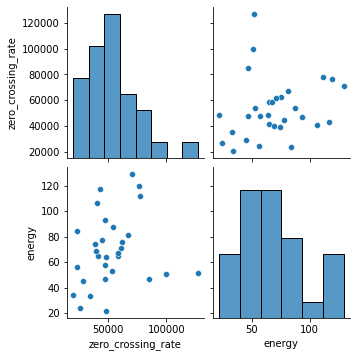

In [9]:
# visualise the data using pairplot

sns.pairplot(audio_features_df);

In [10]:
# scale the data using MinMax Scaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
features_scaled = min_max_scaler.fit_transform(audio_features_df)

In [11]:
features_scaled

array([[-0.72224408, -0.78507979],
       [-0.37012269, -0.42220168],
       [-0.21316849, -0.00172027],
       [-0.92999906,  0.16038345],
       [ 0.07532078,  0.67148145],
       [ 0.21084574, -0.5335637 ],
       [ 0.49008148, -0.45637922],
       [-0.46565515, -1.        ],
       [-0.05582092,  1.        ],
       [-0.603353  , -0.19749244],
       [-0.83916831, -0.56235001],
       [-0.28388124, -0.19418775],
       [-0.12662733,  0.0996753 ],
       [-0.62925916, -0.12299232],
       [ 1.        , -0.44452196],
       [-0.28642877, -0.15568701],
       [-0.23103868, -0.08272524],
       [-1.        , -0.77242139],
       [-0.64162218, -0.02082637],
       [-0.48491149, -0.529821  ],
       [-0.57119041,  0.77024116],
       [-0.62073616,  0.57834081],
       [-0.53829727,  0.0375029 ],
       [ 0.05125035,  0.81403539],
       [-0.88436827, -0.95401977],
       [-0.49182355, -0.33549752],
       [-0.49476445,  0.32533786],
       [-0.92951204, -0.36468019],
       [-0.36328557,

In [12]:
# fit a kmeans model based on cluster numbers of your choice

model = KMeans(n_clusters = 2)
labels = model.fit_predict(features_scaled)

In [13]:
# predicted labels

In [14]:
# distribution of labels

Counter(labels)

Counter({0: 23, 1: 7})

In [15]:
# the centroids for the clusters

pd.DataFrame(model.cluster_centers_, columns = audio_features_df.columns)


,zero_crossing_rate,energy
0,-0.410699,-0.341228
1,-0.282747,0.626168


In [16]:
# identify optimal number of clusters


def optimal_number_clusters(df):
    """
    Calculates optimal number of clusted based on Elbow Method
    
    parameters df
    """
    
    Sum_of_squared_distances = []
    K = range(1, 30) # define the range of clusters we would like to cluster the data into

    for k in K:
        km = KMeans(n_clusters = k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)

    plt.figure(figsize=(20,6))

    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

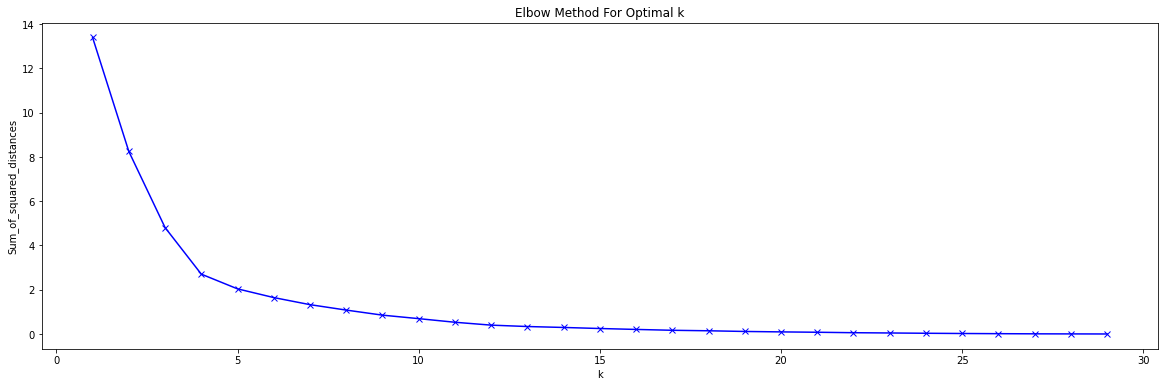

In [17]:
optimal_number_clusters(features_scaled)

In [18]:
optimal_k = 6 # based on the elbow point

model = KMeans(n_clusters = optimal_k)
labels = model.fit_predict(features_scaled)

In [19]:
labels

array([2, 3, 3, 5, 4, 1, 1, 2, 4, 5, 2, 3, 3, 5, 1, 3, 3, 2, 5, 3, 0, 0,
       5, 4, 2, 3, 0, 5, 0, 3], dtype=int32)

In [20]:
# distribution of labels

Counter(labels)

Counter({2: 5, 3: 9, 5: 6, 4: 3, 1: 3, 0: 4})

In [21]:
# dataframe that contains the predicted cluster id for every audio file

labels_df = pd.DataFrame(labels).reset_index(drop = True).rename(columns = {0: "cluster_id"})
audio_features_df = pd.concat([audio_features_df.reset_index(), labels_df], axis= 1 ) 
audio_features_df

,audio_file_name,zero_crossing_rate,energy,cluster_id
0,classical1.wav,35019,33.268707,2
1,marlene.wav,53817,52.843853,3
2,hendrix.wav,62196,75.526360,3
3,beatles.wav,23928,84.270905,5
4,birdland.wav,77597,111.841644,4
5,bigband.wav,84832,46.836525,1
6,rock.wav,99739,51.000175,1
7,blues.wav,48717,21.675022,2
8,chaka.wav,70596,129.563293,4
9,duke.wav,41366,64.965599,5


In [22]:
# select a cluster of interest
# what time of audio files appear
# listen to the audio files and check if this makes sense

audio_features_df[audio_features_df.cluster_id == 0]

,audio_file_name,zero_crossing_rate,energy,cluster_id
20,mingus.wav,43083,117.169151,0
21,brahms.wav,40438,106.817253,0
26,pop.wav,47163,93.169228,0
28,opera.wav,54182,87.688400,0


In [23]:
audio_features_df[audio_features_df.cluster_id == 2]

,audio_file_name,zero_crossing_rate,energy,cluster_id
0,classical1.wav,35019,33.268707,2
7,blues.wav,48717,21.675022,2
10,moanin.wav,28777,45.283672,2
17,guitar.wav,20191,33.951553,2
24,ballad.wav,26364,24.155386,2


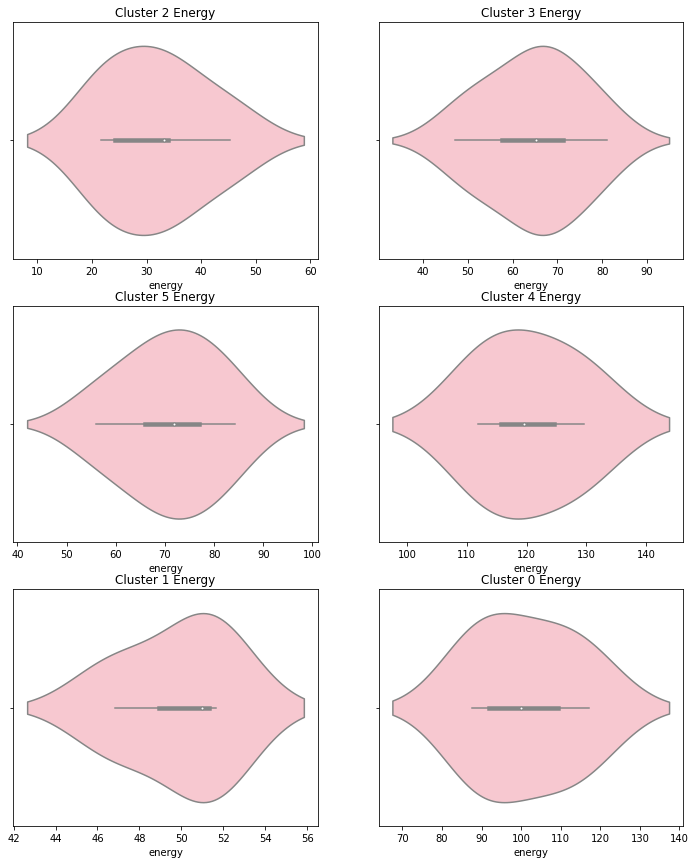

In [24]:
# distribution of energy across all clusters

clusters = audio_features_df["cluster_id"].unique() 

x = 1
plt.figure(figsize=(12, 20))
for x, c in enumerate(clusters):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(f'Cluster {c} Energy')
    sns.violinplot(x = audio_features_df[audio_features_df["cluster_id"] == c]["energy"], color='pink')

    
# we are seeing patterns of high energy and low energy clusters

In [25]:
# high energy cluster

audio_features_df[audio_features_df.cluster_id.isin([1, 4])]



,audio_file_name,zero_crossing_rate,energy,cluster_id
4,birdland.wav,77597,111.841644,4
5,bigband.wav,84832,46.836525,1
6,rock.wav,99739,51.000175,1
8,chaka.wav,70596,129.563293,4
14,bagpipe.wav,126961,51.639805,1
23,canonaki.wav,76312,119.531593,4
